In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [43]:
iris=datasets.load_iris()

In [44]:
x=StandardScaler().fit_transform(iris.data)

In [45]:
pca=PCA(n_components=0.95,whiten=True)

In [46]:
x_pca=pca.fit_transform(x)
print('Original no of Features: ',x.shape[1])
print('Reduced no of Features: ',x_pca.shape[1])

Original no of Features:  4
Reduced no of Features:  2


In [47]:
x[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [48]:
x_pca[0:5]

array([[-1.32123186,  0.50041748],
       [-1.21403663, -0.70276984],
       [-1.37929566, -0.35643181],
       [-1.34146506, -0.62277102],
       [-1.39423839,  0.67431207]])

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [50]:
rng=np.random.RandomState(1)
x=np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(x[:,0],x[:,1])
plt.axis('equal');

In [51]:
pca=PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [52]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


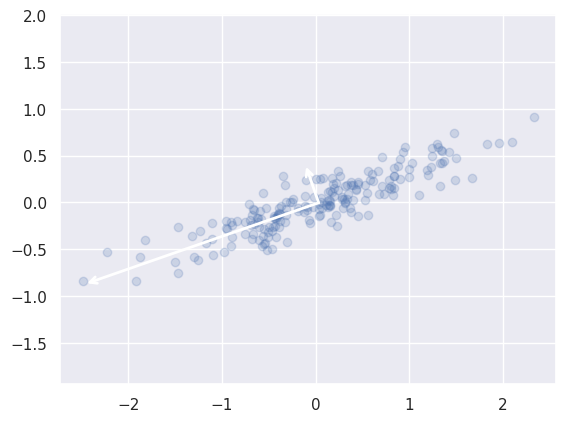

In [53]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [54]:
pca = PCA(n_components=1)
pca.fit(x)
X_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)

original shape:    (200, 2)
transformed shape: (150, 2)


In [55]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [57]:
pca = PCA(n_components=0.95, whiten=True)
X_pca = pca.fit_transform(X)

In [58]:
X_pca[0]
clf = LogisticRegression(random_state=0).fit(X_pca, y)
clf.score(X_pca, y)

0.9666666666666667

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [60]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<ipython-input-61-7564ba3d768d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


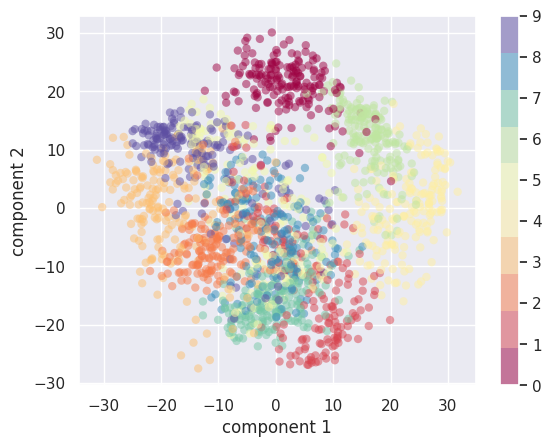

In [61]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]


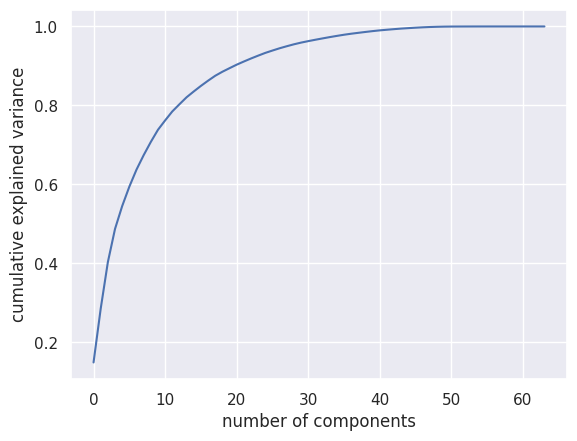

In [63]:
pca = PCA().fit(digits.data)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');